In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pd.set_option('display.max_columns', None)

Data = pd.read_csv("../Data/smalldata.csv")
#print(Data.head())

#Steage 1
Selection = ['pokemonId', 'latitude', 'longitude', 'appearedLocalTime','appearedTimeOfDay', 'appearedHour','appearedMinute',\
             'appearedDay',  'appearedMonth',  'appearedYear','terrainType', 'closeToWater', 'gymDistanceKm','city', 'continent','weather', 'temperature', \
             'windSpeed', 'windBearing', 'pressure','class' ]
Selection = ['pokemonId', 'latitude', 'longitude', 'appearedHour','appearedMinute',\
            'terrainType', 'closeToWater', 'gymDistanceKm','weather', 'temperature', \
             'windSpeed', 'windBearing', 'pressure',\
            'class' ]
ReducedData = Data.loc[:, Selection]
ReducedData.head()

,pokemonId,latitude,longitude,appearedHour,appearedMinute,terrainType,closeToWater,gymDistanceKm,weather,temperature,windSpeed,windBearing,pressure,class
0,16,20.525745,-97.460829,5,57,14,False,0.049869,Foggy,25.5,4.79,269,1018.02,16
1,133,20.523695,-97.461167,5,57,14,False,0.259156,Foggy,25.5,4.79,269,1018.02,133
2,16,38.903590,-77.199780,5,57,13,False,0.489886,Clear,24.2,4.29,218,1015.29,16
3,13,47.665903,-122.312561,5,56,0,True,0.359309,PartlyCloudy,15.6,5.84,160,1020.52,13
4,133,47.666454,-122.311628,5,56,0,True,0.210543,PartlyCloudy,15.6,5.84,160,1020.52,133


In [6]:
ReducedData['weather']= ReducedData['weather'].astype('category')
catedict = dict(enumerate(ReducedData['weather'].cat.categories))
ReducedData['weather'] = ReducedData['weather'].cat.codes
ReducedData.head()

,pokemonId,latitude,longitude,appearedHour,appearedMinute,terrainType,closeToWater,gymDistanceKm,weather,temperature,windSpeed,windBearing,pressure,class
0,16,20.525745,-97.460829,5,57,14,False,0.049869,1,25.5,4.79,269,1018.02,16
1,133,20.523695,-97.461167,5,57,14,False,0.259156,1,25.5,4.79,269,1018.02,133
2,16,38.903590,-77.199780,5,57,13,False,0.489886,0,24.2,4.29,218,1015.29,16
3,13,47.665903,-122.312561,5,56,0,True,0.359309,4,15.6,5.84,160,1020.52,13
4,133,47.666454,-122.311628,5,56,0,True,0.210543,4,15.6,5.84,160,1020.52,133


In [7]:
ReducedData['closeToWater'] = ReducedData['closeToWater'].astype('category')
catedict2 = dict(enumerate(ReducedData['closeToWater'].cat.categories))
ReducedData['closeToWater'] = ReducedData['closeToWater'].cat.codes
ReducedData.head()

,pokemonId,latitude,longitude,appearedHour,appearedMinute,terrainType,closeToWater,gymDistanceKm,weather,temperature,windSpeed,windBearing,pressure,class
0,16,20.525745,-97.460829,5,57,14,0,0.049869,1,25.5,4.79,269,1018.02,16
1,133,20.523695,-97.461167,5,57,14,0,0.259156,1,25.5,4.79,269,1018.02,133
2,16,38.903590,-77.199780,5,57,13,0,0.489886,0,24.2,4.29,218,1015.29,16
3,13,47.665903,-122.312561,5,56,0,1,0.359309,4,15.6,5.84,160,1020.52,13
4,133,47.666454,-122.311628,5,56,0,1,0.210543,4,15.6,5.84,160,1020.52,133


In [8]:
Datamaxtrix = ReducedData.as_matrix()


/home/tl2861/anaconda3/envs/BASEMAP/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [9]:
x = np.array(Datamaxtrix[:,3:-1])
y = np.array(Datamaxtrix[:,1:3])
print(np.shape(x))
print(np.shape(y))

(300, 10)
(300, 2)


In [10]:
randomindex = np.random.choice(300, 300, replace=False)

In [11]:
#Reindex
x = x[randomindex,:]
y = y[randomindex,:]
#Split into Training and Testing
x_train = x[0:280,:]
x_test = x[280:300,:]
y_train = y[0:280,:]
y_test = y[280:300,:]
print(np.shape(x_train),np.shape(x_test),np.shape(y_train),np.shape(y_test))

(280, 10) (20, 10) (280, 2) (20, 2)


In [14]:
from sklearn import linear_model
from sklearn import ensemble

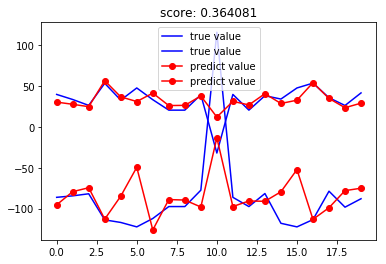

In [15]:
model_LinearRegression = linear_model.LinearRegression()
model = model_LinearRegression 
model.fit(x_train,y_train)
score = model.score(x_test, y_test)
result = model.predict(x_test)
plt.figure()
plt.plot(np.arange(len(result)), y_test,'b',label='true value')
plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
plt.title('score: %f'%score)
plt.legend()

## Plot

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
latitude = result.transpose()[0]
print (latitude)
longitude = result.transpose()[1]
print(longitude)

NameError: name 'result' is not defined

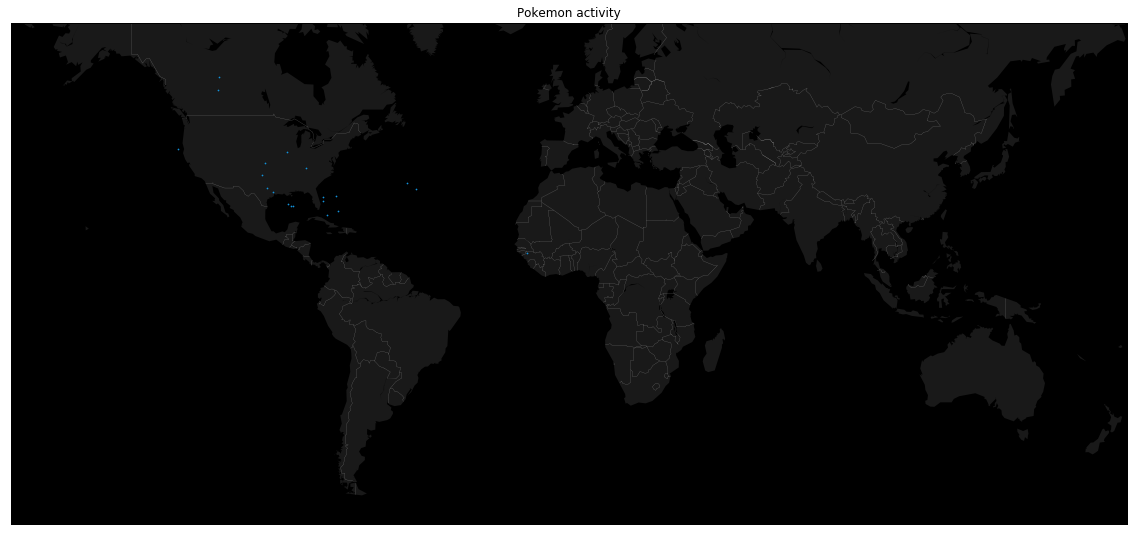

In [24]:
plt.figure(1, figsize=(20,10))
m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')


m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
x, y = m1(longitude,latitude)
m1.scatter(x,y, s=3, c="#1292db", lw=0, alpha=1, zorder=5)
plt.title("Pokemon activity")
plt.show()

In [79]:
predict_latitude = pd.read_csv("../Result/predict_latitude.csv")
predict_longitude = pd.read_csv("../Result/predict_longitude.csv")
true_latitude = pd.read_csv("../Result/true_latitude.csv")
true_longitude = pd.read_csv("../Result/true_longitude.csv")

In [80]:
predict_latitude_q = pd.read_csv("../Result/latitude_result.csv")
predict_longitude_q = pd.read_csv("../Result/longitude_result.csv")

In [53]:
predict_latitude.head()

,Unnamed: 0,Predict_latitude
0,0,48.223936
1,1,3.807657
2,2,42.589273
3,3,34.970166
4,4,48.031649


In [55]:
predict_longitude.head()

,Unnamed: 0,true longitude
0,0,14.912360
1,1,120.288437
2,2,-51.131411
3,3,-103.200015
4,4,-40.330373


In [56]:
true_latitude.head()

,Unnamed: 0,True_latitude
0,0,50.060746
1,1,4.594663
2,2,42.380350
3,3,33.311502
4,4,47.211035


In [57]:
true_longitude.head()

,Unnamed: 0,True_longitude
0,0,14.506891
1,1,114.244019
2,2,-71.144063
3,3,-112.054390
4,4,10.146040


In [47]:
np.shape(predict_latitude)

(88807, 2)

In [49]:
np.shape(true_latitude)

(88807, 2)

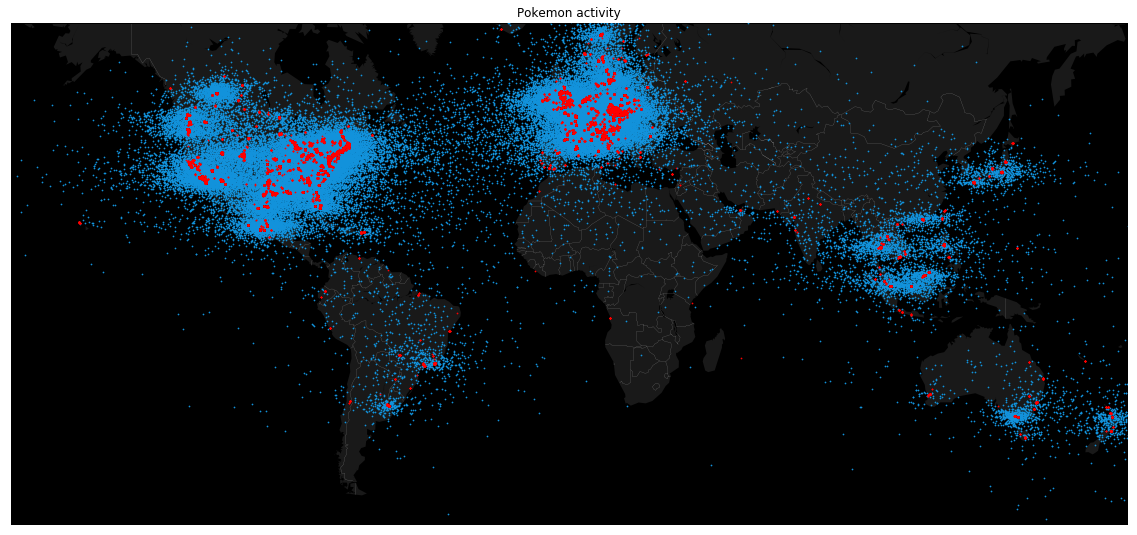

In [78]:
plt.figure(figsize=(20,10))
m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')


m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
x, y = m1(predict_longitude['true longitude'].tolist(),predict_latitude['Predict_latitude'].tolist())
# m2 = Basemap(cprojection='merc',
#              llcrnrlat=-60,
#              urcrnrlat=65,
#              llcrnrlon=-180,
#              urcrnrlon=180,
#              lat_ts=0,
#              resolution='c')


# m2.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
# m2.drawmapboundary(fill_color='#000000')                # black background
# m2.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

x_1,y_1 = m1(true_longitude['True_longitude'].tolist(),true_latitude['True_latitude'].tolist())
x_2,y_2 = m1(predict_longitude_q['0'].tolist(),predict_latitude_q['0'].tolist())
m1.scatter(x_2,y_2, s=3, c="#1292db", lw=0, alpha=1, zorder=5)
m1.scatter(x_1,y_1, s=3, c='r', lw=0,alpha=1,zorder=5)
plt.title("Pokemon activity")
plt.show()


In [42]:
true = pd.read_csv("../Result/city.csv")
true.head()
# len(true)

,Unnamed: 0,0
0,0,New_York
1,1,Zurich
2,2,Oslo
3,3,Chicago
4,4,Chicago


In [43]:
predict = pd.read_csv("../Result/Predict_city.csv")
predict.head()
# len(predict)

,Unnamed: 0,0
0,0,Tokyo
1,1,Rome
2,2,Manila
3,3,Prague
4,4,Madrid


In [44]:
cnt = true.groupby('0')['0'].size()
cnt_p = predict.groupby('0')['0'].size()
# cnt['label']='0'
print(cnt)
print(cnt_p.head())

0
Adelaide           1
Amsterdam        635
Athens            36
Auckland         562
Bahia             17
Bangkok          832
Belem             27
Berlin           462
Boise             30
Bratislava        32
Brisbane          48
Brunei           528
Brussels          14
Bucharest        416
Buenos_Aires     332
Cairo              1
Casablanca         2
Chicago         9573
Copenhagen       177
Cordoba            3
Costa_Rica         3
Denver          1655
Detroit          122
Dubai             65
Dublin           763
Edmonton        1785
Guam              18
Guayaquil         19
Guyana             2
Halifax           36
                ... 
Nicosia           18
Noumea            10
Oslo            1786
Paris           3407
Perth             95
Phoenix         1699
Prague          8409
Puerto_Rico      199
Regina           219
Reunion            1
Reykjavik          9
Rome            4723
Santiago          30
Sao_Paulo        333
Sarajevo           1
Singapore        434
Stockholm  

In [47]:
# cnt = cnt.to_frame()
cnt_index = np.expand_dims(np.array(cnt.index),axis=1)
cnt_values = np.expand_dims(np.array(cnt.values),axis=1)
print ("cnt_index:len{}\n{}".format(len(cnt_index),cnt_index))
print ("cnt_values:len()\n{}".format(len(cnt_index),cnt_values))
label = np.full((len(cnt_index),1),'true')
cnt_true = np.concatenate((cnt_index,cnt_values,label),axis=1)
# cnt = np.array(cnt)
# cnt.reindex(columns={cnt.columns[1]:'value'},inplace=True)
print(cnt_true)

cnt_index:len89
[['Adelaide']
 ['Amsterdam']
 ['Athens']
 ['Auckland']
 ['Bahia']
 ['Bangkok']
 ['Belem']
 ['Berlin']
 ['Boise']
 ['Bratislava']
 ['Brisbane']
 ['Brunei']
 ['Brussels']
 ['Bucharest']
 ['Buenos_Aires']
 ['Cairo']
 ['Casablanca']
 ['Chicago']
 ['Copenhagen']
 ['Cordoba']
 ['Costa_Rica']
 ['Denver']
 ['Detroit']
 ['Dubai']
 ['Dublin']
 ['Edmonton']
 ['Guam']
 ['Guayaquil']
 ['Guyana']
 ['Halifax']
 ['Helsinki']
 ['Ho_Chi_Minh']
 ['Hobart']
 ['Hong_Kong']
 ['Honolulu']
 ['Indianapolis']
 ['Isle_of_Man']
 ['Istanbul']
 ['Jakarta']
 ['Karachi']
 ['Kiev']
 ['Kolkata']
 ['Kuala_Lumpur']
 ['Kuching']
 ['Lisbon']
 ['Ljubljana']
 ['London']
 ['Los_Angeles']
 ['Louisville']
 ['Luanda']
 ['Luxembourg']
 ['Madrid']
 ['Manila']
 ['Melbourne']
 ['Mexico_City']
 ['Monterrey']
 ['Montreal']
 ['Moscow']
 ['New_York']
 ['Nicosia']
 ['Noumea']
 ['Oslo']
 ['Paris']
 ['Perth']
 ['Phoenix']
 ['Prague']
 ['Puerto_Rico']
 ['Regina']
 ['Reunion']
 ['Reykjavik']
 ['Rome']
 ['Santiago']
 ['Sao_Pau

In [49]:
# cnt = cnt.to_frame()
cnt_p_index = np.expand_dims(np.array(cnt.index),axis=1)
cnt_p_values = np.expand_dims(np.array(cnt.values),axis=1)
print ("cnt_index:len{}\n{}".format(len(cnt_index),cnt_index))
print ("cnt_values:len()\n{}".format(len(cnt_index),cnt_values))
label_p = np.full((len(cnt_index),1),'predict')
cnt_predict = np.concatenate((cnt_p_index,cnt_p_values,label_p),axis=1)
# cnt = np.array(cnt)
# cnt.reindex(columns={cnt.columns[1]:'value'},inplace=True)
print(cnt_predict)

cnt_index:len89
[['Adelaide']
 ['Amsterdam']
 ['Athens']
 ['Auckland']
 ['Bahia']
 ['Bangkok']
 ['Belem']
 ['Berlin']
 ['Boise']
 ['Bratislava']
 ['Brisbane']
 ['Brunei']
 ['Brussels']
 ['Bucharest']
 ['Buenos_Aires']
 ['Cairo']
 ['Casablanca']
 ['Chicago']
 ['Copenhagen']
 ['Cordoba']
 ['Costa_Rica']
 ['Denver']
 ['Detroit']
 ['Dubai']
 ['Dublin']
 ['Edmonton']
 ['Guam']
 ['Guayaquil']
 ['Guyana']
 ['Halifax']
 ['Helsinki']
 ['Ho_Chi_Minh']
 ['Hobart']
 ['Hong_Kong']
 ['Honolulu']
 ['Indianapolis']
 ['Isle_of_Man']
 ['Istanbul']
 ['Jakarta']
 ['Karachi']
 ['Kiev']
 ['Kolkata']
 ['Kuala_Lumpur']
 ['Kuching']
 ['Lisbon']
 ['Ljubljana']
 ['London']
 ['Los_Angeles']
 ['Louisville']
 ['Luanda']
 ['Luxembourg']
 ['Madrid']
 ['Manila']
 ['Melbourne']
 ['Mexico_City']
 ['Monterrey']
 ['Montreal']
 ['Moscow']
 ['New_York']
 ['Nicosia']
 ['Noumea']
 ['Oslo']
 ['Paris']
 ['Perth']
 ['Phoenix']
 ['Prague']
 ['Puerto_Rico']
 ['Regina']
 ['Reunion']
 ['Reykjavik']
 ['Rome']
 ['Santiago']
 ['Sao_Pau

In [65]:
# print (label1)
# cnt = cnt
# cnt.head()
# cnt = cnt.reindex(columns=list("label"),fill_value=1)

# df_cnt = pd.concat([cnt,label1['label']],axis=1)
# print(df_cnt)
# df_cnt

# df_cnt = pd.concat([cnt,cnt_p])
# df_cnt.head()

cnt_all = np.concatenate((cnt_true,cnt_predict),axis=0)
cnt_all_df = pd.DataFrame(cnt_all,columns=['city','values','label'])
cnt_all_df[['values']]= cnt_all_df[['values']].apply(pd.to_numeric)
cnt_all_df
# print(type(cnt_all_df['values']))

,city,values,label
0,Adelaide,1,true
1,Amsterdam,635,true
2,Athens,36,true
3,Auckland,562,true
4,Bahia,17,true
5,Bangkok,832,true
6,Belem,27,true
7,Berlin,462,true
8,Boise,30,true
9,Bratislava,32,true


In [63]:
# data = (
#     cnt_all_df.set_index('city')
#       .stack()  # un-pivots the data 
#       .reset_index()  # moves all data out of the index
#       .rename(columns={'level_1': 'Variable', 0: 'Value'})
# )

,city,level_1,0
0,Adelaide,values,1
1,Adelaide,label,true
2,Amsterdam,values,635
3,Amsterdam,label,true
4,Athens,values,36
5,Athens,label,true
6,Auckland,values,562
7,Auckland,label,true
8,Bahia,values,17
9,Bahia,label,true


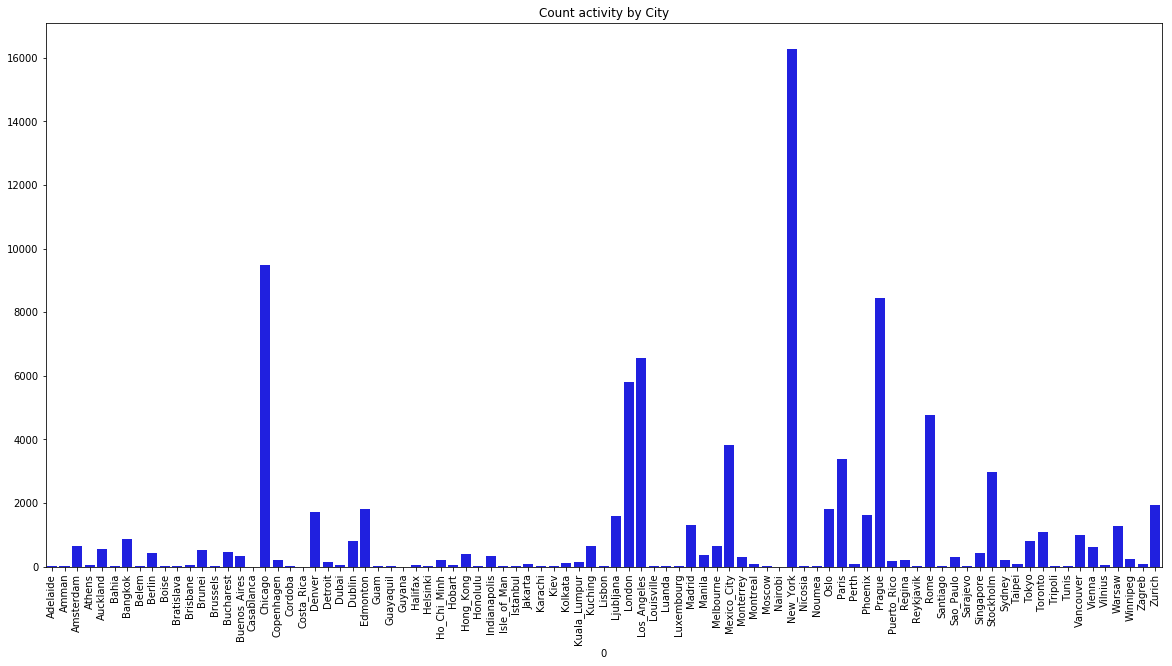

In [45]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=cnt_p.index, y=cnt_p.values, color='b', ax=ax)
plt.xticks(rotation=90)
plt.setp(ax.patches, linewidth=0)
texts = ax.set(title="Count activity by City")

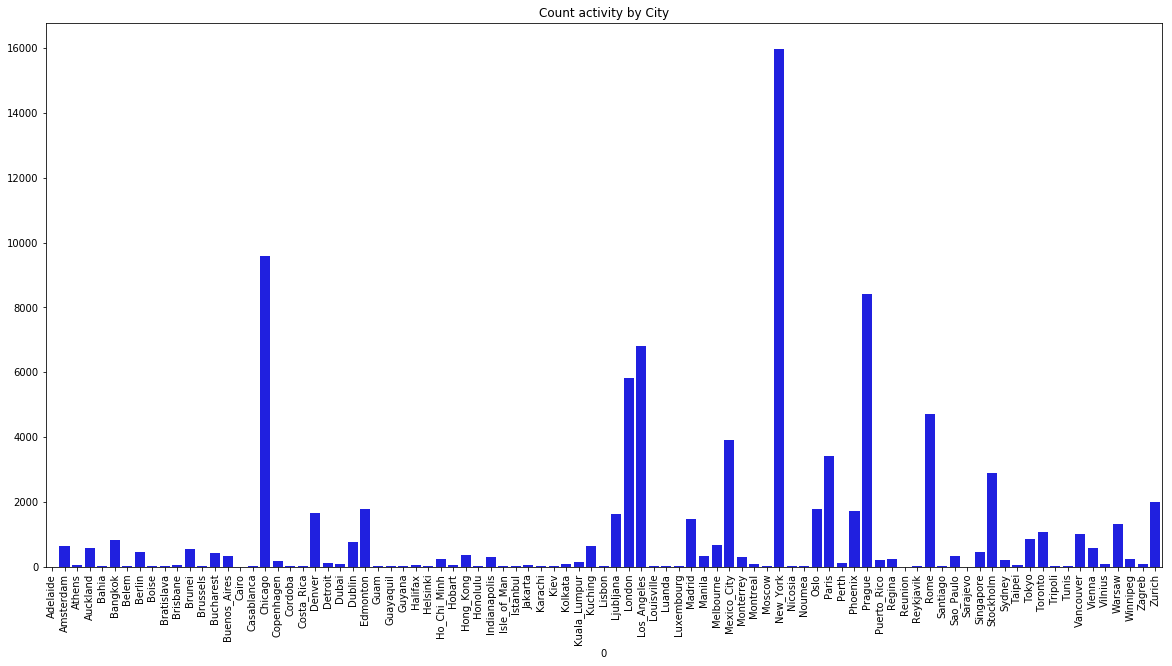

In [46]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=cnt.index, y=cnt.values, color='b', ax=ax)
plt.xticks(rotation=90)
plt.setp(ax.patches, linewidth=0)
texts = ax.set(title="Count activity by City")

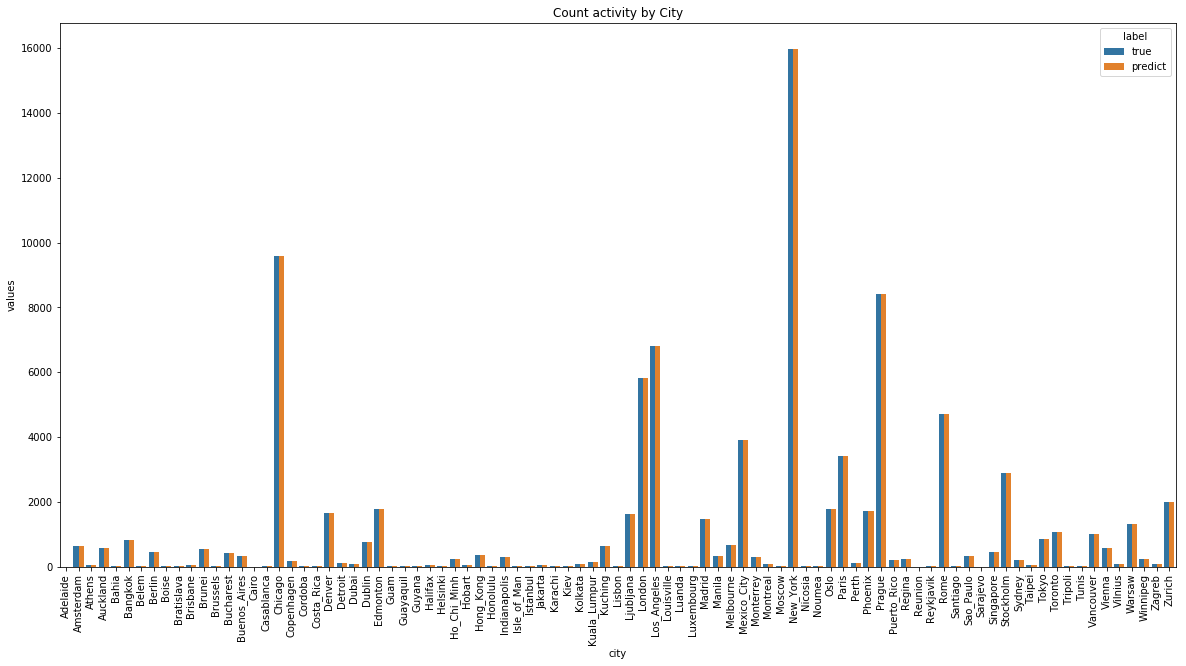

In [69]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=cnt_all_df['city'], y=cnt_all_df['values'], hue=cnt_all_df['label'], data=cnt_all_df, ax=ax)
plt.xticks(rotation=90)
plt.setp(ax.patches, linewidth=0)
texts = ax.set(title="Count activity by City")